## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 17 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (17/17), 1.88 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

1. Load the ./data/car_data.csv data. Look at the head and dimensions of the data.

In [3]:
df1 = pd.read_csv('/content/assignment3/data/car_data.csv')
print(df1.shape)
df1.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


2. Summarize the variables (User.ID, Gender, Age, AnnualSalary, Purchase). Are there any missings to clean? Convert the Gender categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix  𝑋  of predictors including Age and AnnualSalary, and an outcome  𝑦  equaling Purchase.

In [4]:
df1.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
missing_values = df1.isnull().sum()
print(missing_values) #there is no missing values

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [6]:
df1['gender_dummy'] = 0 #making male 0
df1.loc[df1['Gender']=='Female', 'gender_dummy'] = 1 #finding the variables where the gener is female and refer to column g_d to put 1 as female
df1['gender_dummy'].value_counts() #check dummy values

1    516
0    484
Name: gender_dummy, dtype: int64

In [7]:
x = df1.loc[:, ['Age','AnnualSalary']]
y = df1['Purchased']

3. MaxMin-normalize Age and AnnualSalary in X.

In [8]:
def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

x = x.apply(maxmin)
x.head()

,Age,AnnualSalary
0,0.377778,0.036364
1,0.488889,0.207273
2,0.688889,0.429091
3,0.488889,0.672727
4,0.155556,0.465455


4. Split the sample into a ~80% training dataset and a ~20% testing dataset

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2,
                                                    random_state = 100)

5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors

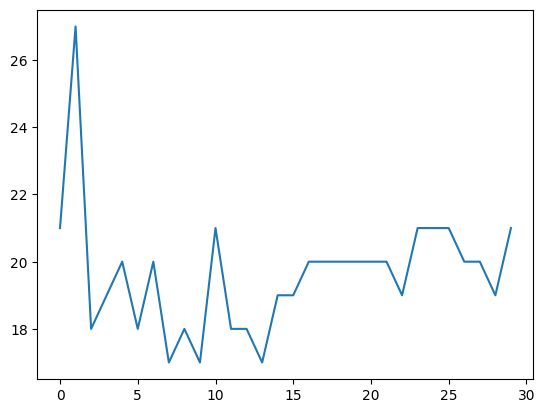

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k_bar = 30
k_grid = np.arange(1, k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors = k+1)
  fitted_model = model.fit(x_train, y_train)
  y_hat = fitted_model.predict(x_test)
  SSE[k] = np.sum((y_test - y_hat)**2)


plt.plot(np.arange(0,k_bar),SSE,label='Test')
#we choose k=9

6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

In [11]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(x_train,y_train)
y_hat = fitted_model.predict(x_test)

pd.crosstab(y_test, y_hat)

#how often model predict a sale when one fails to occur: 8
#how often model predict no sale when one does occer: 6
#Overall: 14/200 = 0.07 eror rate it's pretty accurate

col_0,0,1
Purchased,,
0,104,15
1,3,78


7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)


In [12]:
x = df1.loc[:, ['Age','AnnualSalary', 'Gender']]
y = df1['Purchased']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2,random_state = 100)

model = KNeighborsClassifier(n_neighbors=9) # Create a sk model for k
fitted_model = model.fit(x_train.drop('Gender', axis = 1), y_train)
y_hat = fitted_model.predict(x_test.drop('Gender',axis=1))

y_hat_male = y_hat[x_test['Gender'] == 'Male']
y_hat_female = y_hat[x_test['Gender'] == 'Female']
y_male = y_test[x_test['Gender'] == 'Male']
y_female = y_test[x_test['Gender']== 'Female']

In [13]:
pd.crosstab(y_female, y_hat_female)

col_0,0,1
Purchased,,
0,58,9
1,5,33


In [14]:
pd.crosstab(y_male, y_hat_male)

col_0,0,1
Purchased,,
0,45,7
1,15,28


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [15]:
df2 = pd.read_csv('/content/assignment3/data/USA_cars_datasets.csv')
df2 = df2.loc[:, ['price', 'year', 'mileage']]

missing_values = df2.isnull().sum()
print(missing_values) #there is no missing avlues

price      0
year       0
mileage    0
dtype: int64


In [16]:
print(df2.shape)
df2.head()

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [17]:
print(df2.dtypes)

price      int64
year       int64
mileage    int64
dtype: object


2. Maxmin normalize `year` and `mileage`.

In [18]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df2['year'] = maxmin(df2['year'])
df2['mileage'] = maxmin(df2['mileage'])

3. Split the sample into ~80% for training and ~20% for evaluation.

In [19]:
from sklearn.model_selection import train_test_split
y = df2['price']
X = df2.loc[:, ['year', 'mileage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 100)

4. Use the kNN algorithm for regression and the training data to predict price using year and mileage for the test set for . For each value of , compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase ?

Mean Squared Error for k=3: 63223286609.11111
Mean Squared Error for k=10: 55401092793.409996
Mean Squared Error for k=25: 51585228924.304
Mean Squared Error for k=50: 49847721982.09799
Mean Squared Error for k=100: 49135529480.4603
Mean Squared Error for k=300: 50238649457.106


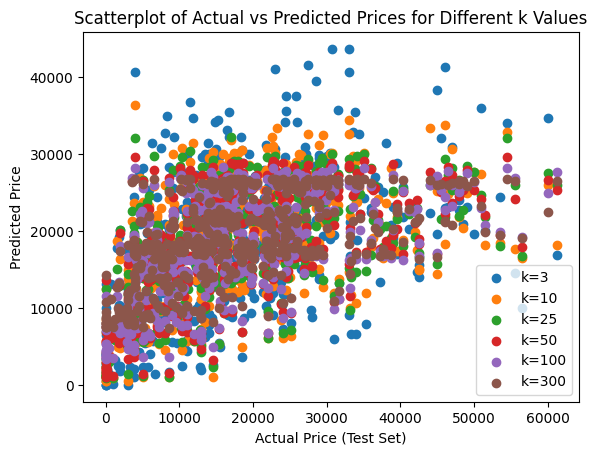

In [20]:
from sklearn.neighbors import KNeighborsRegressor

for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum((y_test - y_hat)**2)
    plt.scatter(y_test, y_hat, label=f'k={k}')
    print(f'Mean Squared Error for k={k}: {SSE}')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Scatterplot of Actual vs Predicted Prices for Different k Values')
plt.show()

#I notice as the k value is increasing, they're more and more compressed into the
#30000 price line

5. Determine the optimal k for these data.

[77]


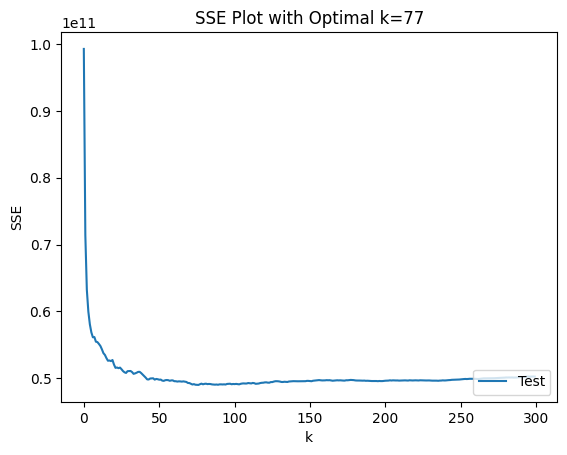

In [27]:
from sklearn.neighbors import KNeighborsRegressor

k_bar = 300
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)


plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE Plot with Optimal k=77')
plt.show()


**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
df5 = pd.read_csv('/content/assignment3/data/airbnb_hw.csv')
print(df5.shape)
df5.dtypes

(30478, 13)


Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object

In [ ]:
df5 = df5.rename(columns = {'Number Of Reviews':'Number of Reviews'})
df5 = df5.loc[:, ['Price', 'Beds','Number of Reviews','Review Scores Rating']]
df5.head()

,Price,Beds,Number of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0


In [ ]:
#clean price
price = df5['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price)
price = price.dropna()
df5['Price'] = price
df5['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [ ]:
#clean Beds
df5['Beds'].value_counts()

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64

In [ ]:
df5['Beds'].unique

<bound method Series.unique of 0        1.0
1        1.0
2        1.0
3        3.0
4        3.0
        ... 
30473    5.0
30474    2.0
30475    1.0
30476    1.0
30477    1.0
Name: Beds, Length: 30478, dtype: float64>

In [ ]:
beds = df5['Beds']
bedsnacount = beds.isnull().sum()
print('na values', bedsnacount)

na values 85


In [ ]:
beds = beds.fillna(1)
df5['Beds'] = beds
beds.describe()

count    30478.000000
mean         1.528611
std          1.014327
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

In [ ]:
#clean number of reviews
nor = df5['Number of Reviews']
nor.unique() #pretty clean

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [ ]:
#clean review score
df5 = df5.dropna()
rs = df5['Review Scores Rating']
rs.unique() #has nan

array([ 96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,  85.,
        86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,  83.,
        66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,  71.,
        75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,  58.,
        43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [ ]:
rsna = rs.isnull().sum()
print('Reivew Scores Rating Na Value Count:', rsna) #a lot of them don't have reviews
#drop all beacuse they're not useful

Reivew Scores Rating Na Value Count: 0


In [ ]:
#maxmin normalize and create X from original dataset

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

X = df5
z = df5.drop('Price', axis = 1)
z = z.apply(maxmin)

In [ ]:
#sklearn for k=6

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6, max_iter=300, n_init = 10, random_state = 0)
model = model.fit(z)
z['g_hat'] = model.predict(z)
z['Cluster'] = model.labels_

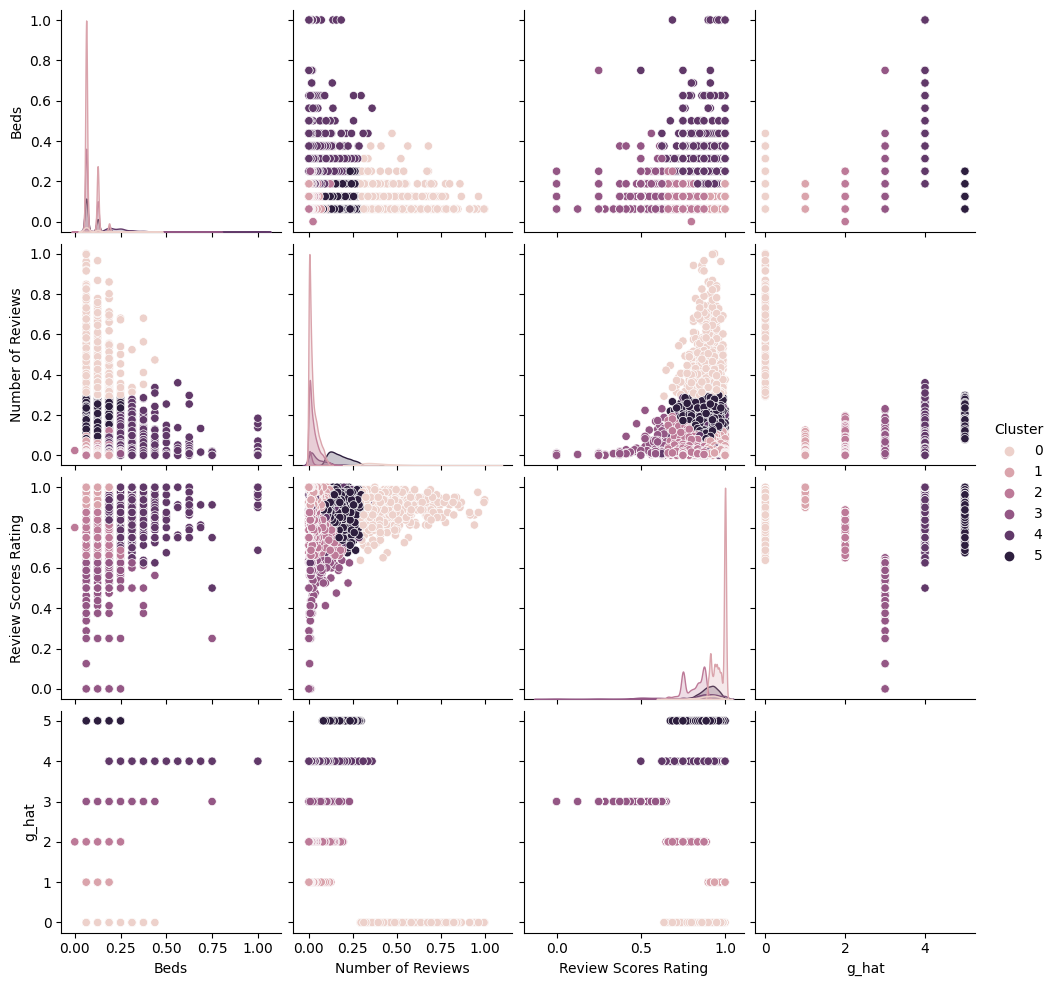

In [ ]:
sns.pairplot(data = z, hue = 'Cluster')

In [ ]:
X['Cluster'] = model.labels_
X.loc[:,['Price','Cluster'] ].groupby('Cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
Cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Cluster 3 has the highest rental price

Text(0.5, 1.0, 'Scree Plot')

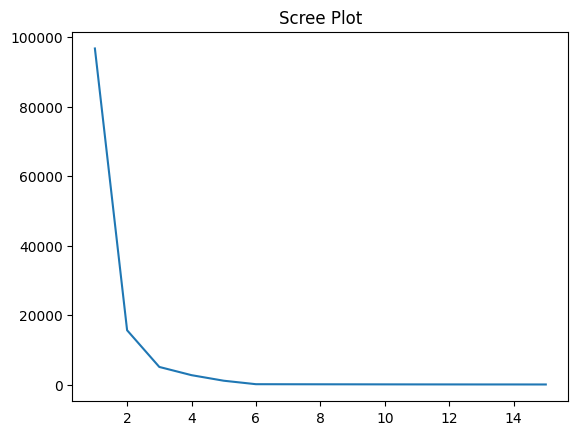

In [ ]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
#from the graph we can see the elbow is around k = 3

Price                                                            
           count        mean         std   min   25%    50%     75%      max
Cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

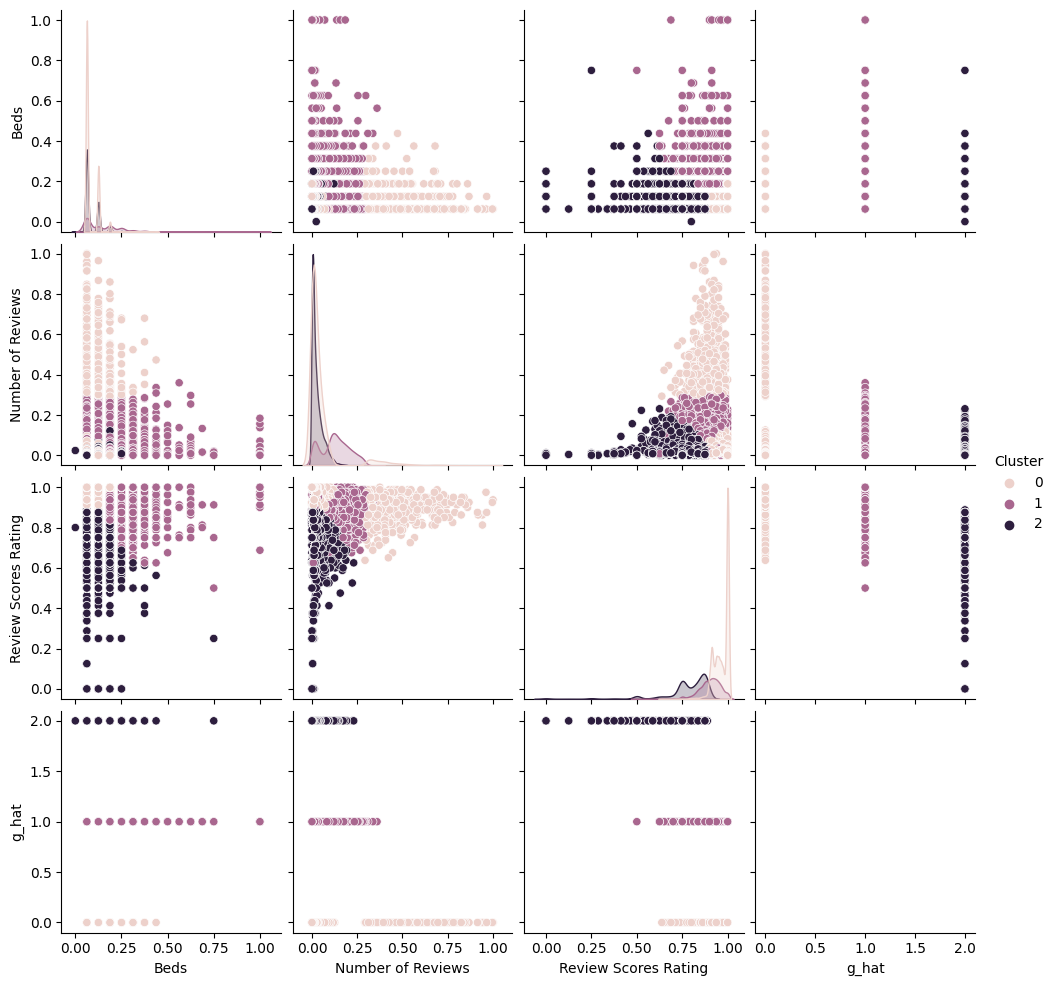

In [ ]:
X = df5
z = df5.drop('Price', axis = 1)
z = z.apply(maxmin)

model = KMeans(n_clusters = 3, max_iter=300, n_init = 10, random_state = 0)
model = model.fit(z)
z['g_hat'] = model.predict(z)
z['Cluster'] = model.labels_

sns.pairplot(data=z,hue='Cluster')
X['Cluster'] = model.labels_
X.loc[:,['Price','Cluster'] ].groupby('Cluster').describe()